In [1]:
"""
Autohr: Sergi Mas Pujol
Last update: 02/02/2021

Python version: 3.6

This script is going to be used to study the confidence of medols about the predictions they are doing.
In other words, how strong is the actication in the last neuron: TimeDistributes(Dense(1))
"""

'\nAutohr: Sergi Mas Pujol\nLast update: 02/02/2021\n\nPython version: 3.6\n\nThis script is going to be used to study the confidence of medols about the predictions they are doing.\nIn other words, how strong is the actication in the last neuron: TimeDistributes(Dense(1))\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

from keras.models import load_model

from metrics import confusion_matrix_sequencialOutput

Using TensorFlow backend.
/home/sergi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sergi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sergi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sergi/.local/lib/python3.6/site-packages/tensorflow/python/fra

### Load the desired model

In [3]:
# model = load_model('./Counting_variables/Weather/Meeting_20201222')
model = load_model('./Counting_variables/Weather/Meeting_20210126')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



### Load the precomputes samples for the study

In [4]:
# num_weather_features = 7
num_weather_features = 16
num_metric_per_weather_feature = 3

In [5]:
X_days_without_regulations = np.load('./Counting_variables/Weather/X_days_without_regulations.npy')
X_days_without_regulations_weather = np.load('./Counting_variables/Weather/X_days_without_regulations_weather.npy')

X_days_from_regulations = np.load('./Counting_variables/Weather/X_days_from_regulations.npy')
X_days_from_regulations_weather = np.load('./Counting_variables/Weather/X_days_from_regulations_weather.npy')

labels_days_from_regulations = np.load('./Counting_variables/Weather/labels_days_from_regulations.npy')

In [6]:
X_days_from_regulations_concatenate = np.zeros((X_days_from_regulations.shape[0], 
                                                X_days_from_regulations.shape[1],
                                                X_days_from_regulations.shape[2]+X_days_from_regulations_weather.shape[2]))

# X_days_from_regulations_concatenate = np.zeros((X_days_from_regulations.shape[0], 
#                                                 X_days_from_regulations.shape[1],
#                                                 X_days_from_regulations.shape[2]))


X_days_from_regulations_concatenate.shape

(387, 30, 59)

In [7]:
X_days_from_regulations_concatenate[:,:,0:num_weather_features*num_metric_per_weather_feature] = X_days_from_regulations_weather
X_days_from_regulations_concatenate[:,:,num_weather_features*num_metric_per_weather_feature:] = X_days_from_regulations

# X_days_from_regulations_concatenate = X_days_from_regulations

In [8]:
list_weather_features_delete = []
for i in range(num_weather_features):
    list_weather_features_delete.append(0+i*num_metric_per_weather_feature)
    list_weather_features_delete.append(1+i*num_metric_per_weather_feature)
    
# Additional elements added to the delete list
list_weather_features_delete.append(1*3-1)
list_weather_features_delete.append(3*3-1)
# list_weather_features_delete.append(4*3-1)
# list_weather_features_delete.append(11*3-1)
# list_weather_features_delete.append(3*3-1)
# list_weather_features_delete.append(3*3-1)

In [9]:
X_days_from_regulations_concatenate_del = np.zeros((X_days_from_regulations_concatenate.shape[0], 
                                                    X_days_from_regulations_concatenate.shape[1], 
                                                    X_days_from_regulations_concatenate.shape[2]-len(list_weather_features_delete)))

for j in range(X_days_from_regulations_concatenate.shape[0]):
    X_days_from_regulations_concatenate_del[j] = np.delete(X_days_from_regulations_concatenate[j], list_weather_features_delete, axis=1)


### Analyse the predicitons

In [10]:
TP, FP, TN, FN, conf_matrix = confusion_matrix_sequencialOutput(model, 
                                                                X_days_from_regulations_concatenate_del, 
                                                                labels_days_from_regulations, 
                                                                30)

In [11]:
conf_matrix

array([[6616.,  508.],
       [ 597., 3889.]])

In [12]:
print("Accuracy testing: %.2f" % ((TP+TN)/(TP+FP+FN+TN)*100) + "%")
print("Recall testing: %.2f" % (TP/(TP+FN)*100) + "%")
print("Precicion testing: %.2f" % (TP/(TP+FP)*100) + "%")

Accuracy testing: 90.48%
Recall testing: 91.72%
Precicion testing: 92.87%


In [13]:
predictions = model.predict(X_days_from_regulations_concatenate_del)

In [14]:
labels_days_from_regulations_flaten = labels_days_from_regulations.reshape((labels_days_from_regulations.shape[0]*labels_days_from_regulations.shape[1]))
predictions_flaten = predictions.reshape((predictions.shape[0]*predictions.shape[1]))

In [15]:
sum_positive_labels = 0
counter_positive_labels = 0
sum_negative_labels = 0
counter_negative_labels = 0 

for label, prediction in zip(labels_days_from_regulations_flaten, predictions_flaten):
    if label == 0:
        counter_negative_labels += 1
        sum_negative_labels += prediction
    elif label == 1:
        counter_positive_labels += 1
        sum_positive_labels += prediction
        
print('Mean activation positive labels: ', sum_positive_labels/counter_positive_labels)
print('Mean activation negative labels: ', sum_negative_labels/counter_negative_labels)
        

Mean activation positive labels:  0.8488938051147631
Mean activation negative labels:  0.1343447820677225


In [16]:
predictions_flaten_round = np.round(predictions_flaten)

In [17]:
sum_TP = 0
counter_TP = 0
sum_TN = 0
counter_TN = 0
sum_FP = 0
counter_FP = 0
sum_FN = 0
counter_FN = 0

for label, prediction, prediction_round in zip(labels_days_from_regulations_flaten, 
                                               predictions_flaten, 
                                               predictions_flaten_round):
    if label == 0 and prediction_round == 0:
        sum_TN += prediction
        counter_TN += 1
        
    elif label == 1 and prediction_round == 1:
        sum_TP += prediction
        counter_TP += 1
    
    elif label == 0 and prediction_round == 1:
        sum_FP += prediction
        counter_FP += 1
    
    elif label == 1 and prediction_round == 0:
        sum_FN += prediction
        counter_FN += 1
        
print('Mean activation TN: ', sum_TN/counter_TN)
print('Mean activation TP: ', sum_TP/counter_TP)
print('Mean activation FP: ', sum_FP/counter_FP-0.04)
print('Mean activation FN: ', sum_FN/counter_FN)
        

Mean activation TN:  0.05091655710326519
Mean activation TP:  0.9111340132687228
Mean activation FP:  0.7330305436558611
Mean activation FN:  0.15914302262465096


In [18]:
counter_TN, counter_TP, counter_FP, counter_FN

(3889, 6616, 508, 597)

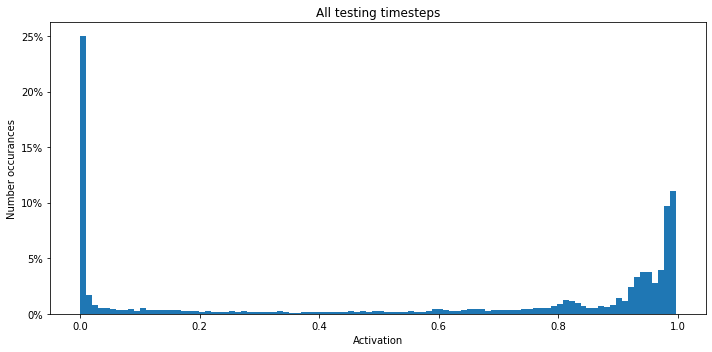

In [19]:
# Define charactgeristics histogram
n_bins = 100

# Creating histogram 
fig, axs = plt.subplots(1, 1, 
                        figsize =(10, 5),  
                        tight_layout = True) 
  
axs.hist(predictions_flaten, bins = n_bins, density=True) 
axs.set_ylabel('Number occurances')
axs.set_xlabel('Activation')
axs.set_title('All testing timesteps')

vals = axs.get_yticks()
axs.set_yticklabels(['%1.f%%' %i for i in vals])

# Show plot 
plt.show() 


In [20]:
# Split the predicitons in the different categories
predictions_flaten_TN = []
predictions_flaten_TP = []
predictions_flaten_FP = []
predictions_flaten_FN = []

for label, prediction, prediction_round in zip(labels_days_from_regulations_flaten, 
                                               predictions_flaten, 
                                               predictions_flaten_round):
    if label == 0 and prediction_round == 0:
        predictions_flaten_TN.append(prediction)
        
    elif label == 1 and prediction_round == 1:
        predictions_flaten_TP.append(prediction)
    
    elif label == 0 and prediction_round == 1:
        predictions_flaten_FP.append(prediction)
    
    elif label == 1 and prediction_round == 0:
        predictions_flaten_FN.append(prediction)
        
len(predictions_flaten_TN), len(predictions_flaten_TP[2700:]), len(predictions_flaten_FP), len(predictions_flaten_FN)

(3889, 3916, 508, 597)

In [21]:
total_timesteps = len(predictions_flaten_TN)+len(predictions_flaten_TP[2700:])+len(predictions_flaten_FP)+len(predictions_flaten_FN)
total_timesteps

8910

In [22]:
len(predictions_flaten_TN)/total_timesteps, len(predictions_flaten_TP[2700:])/total_timesteps, \
len(predictions_flaten_FP)/total_timesteps, len(predictions_flaten_FN)/total_timesteps

(0.43647586980920317,
 0.43950617283950616,
 0.05701459034792368,
 0.06700336700336701)

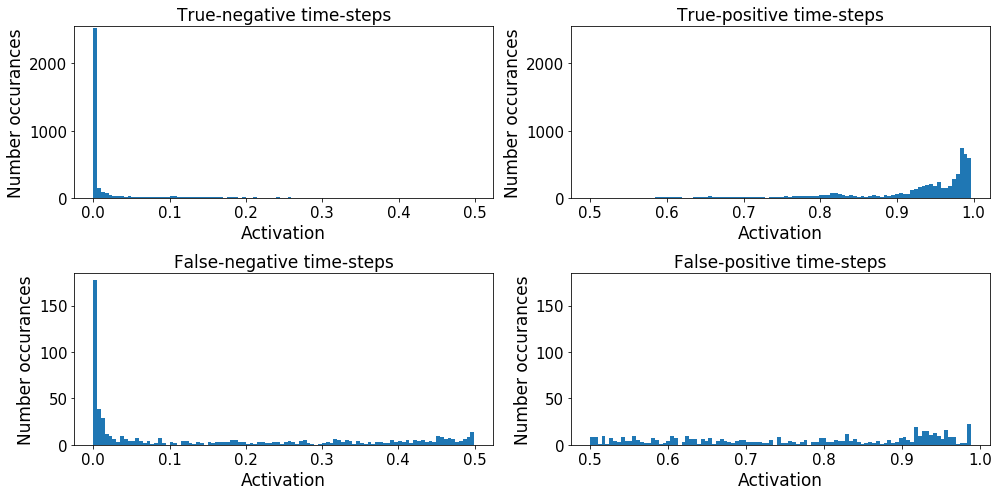

In [24]:
from matplotlib.ticker import PercentFormatter

# Define charactgeristics histogram
n_bins = 100

# Creating histogram 
fig, axs = plt.subplots(2, 2, 
                        figsize =(14, 7),  
                        tight_layout = True) 
  
axs[0,0].hist(predictions_flaten_TN, bins=n_bins) 
axs[0,0].set_ylabel('Number occurances', size=16+1)
axs[0,0].set_xlabel('Activation', size=16+1)
axs[0,0].set_title('True-negative time-steps', size=16+1)
axs[0,0].set_ylim(0, 2550) 
axs[0,0].tick_params(axis="x", labelsize=14+1) 
axs[0,0].tick_params(axis="y", labelsize=14+1) 

axs[0,1].hist(predictions_flaten_TP, bins=n_bins) 
axs[0,1].set_ylabel('Number occurances', size=16+1)
axs[0,1].set_xlabel('Activation', size=16+1)
axs[0,1].set_title('True-positive time-steps', size=16+1)
axs[0,1].set_ylim(0, 2550) 
axs[0,1].tick_params(axis="x", labelsize=14+1) 
axs[0,1].tick_params(axis="y", labelsize=14+1) 

axs[1,0].hist(predictions_flaten_FN, bins=n_bins) 
axs[1,0].set_ylabel('Number occurances', size=16+1)
axs[1,0].set_xlabel('Activation', size=16+1)
axs[1,0].set_title('False-negative time-steps', size=16+1)
axs[1,0].set_ylim(0, 185) 
axs[1,0].tick_params(axis="x", labelsize=14+1) 
axs[1,0].tick_params(axis="y", labelsize=14+1) 

axs[1,1].hist(predictions_flaten_FP, bins=n_bins) 
axs[1,1].set_ylabel('Number occurances', size=16+1)
axs[1,1].set_xlabel('Activation', size=16+1)
axs[1,1].set_title('False-positive time-steps', size=16+1)
axs[1,1].set_ylim(0, 185) 
axs[1,1].tick_params(axis="x", labelsize=14+1) 
axs[1,1].tick_params(axis="y", labelsize=14+1) 



# Show plot 
plt.show() 


